# Feature Selection

In [1]:
import warnings

import pandas as pd
import numpy as np

df_path = 'C:\imbalance_forecast\data\df_nord.csv'
df_nord = pd.read_csv(df_path, index_col=0, parse_dates=True)

# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Remove duplicates by keeping the first occurrence
df_nord = df_nord[~df_nord.index.duplicated(keep='first')]

df_nord

<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
C:\Users\samueledelia\AppData\Local\Temp\2\ipykernel_4324\1532803225.py:6: SyntaxWarning: invalid escape sequence '\i'
  df_path = 'C:\imbalance_forecast\data\df_nord.csv'


,SBIL_MWH,SBIL_MWH_lag1,SBIL_MWH_lag4,SBIL_MWH_lag96,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,AUSTRIA_MWQH,...,SWITZERLAND_MWQH,SCHEDULED_INTERNAL_EXCHANGE_MW,MGP_NORD_PURCHASES,MGP_NORD_SALES,MI1_NORD_PURCHASES,MI1_NORD_SALES,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW,DAY_AHEAD_TOTAL_LOAD_MW_NORD,ACTUAL_TOTAL_LOAD_MW_NORD
ORAINI,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00,-1.847,63.465,-156.567,38.978,1402.5,3242.5,0.0,407.5,167.5,39.25,...,526.00,82.800,3221.22925,2003.79250,151.94800,106.55450,13261.060,13912.337,3194.50,3126.25
2019-01-03 00:15:00,-11.944,-1.847,-63.103,56.932,1402.5,3242.5,0.0,407.5,167.5,39.25,...,526.00,82.800,3221.22925,2003.79250,151.94800,106.55450,12996.362,13697.814,3194.50,3126.25
2019-01-03 00:30:00,0.336,-11.944,16.441,122.707,1402.5,3242.5,0.0,407.5,167.5,39.25,...,526.00,82.800,3221.22925,2003.79250,151.94800,106.55450,12869.871,13592.390,3194.50,3126.25
2019-01-03 00:45:00,55.911,0.336,63.465,174.893,1402.5,3242.5,0.0,407.5,167.5,39.25,...,526.00,82.800,3221.22925,2003.79250,151.94800,106.55450,12624.143,13419.621,3194.50,3126.25
2019-01-03 01:00:00,-17.541,55.911,-1.847,99.216,1360.0,3160.0,0.0,395.0,170.0,40.50,...,398.75,221.895,3076.62150,1992.72250,129.96975,134.68950,12234.627,13132.506,2954.75,2918.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25 23:00:00,-100.631,233.175,-29.154,144.160,912.5,2947.5,0.0,1167.5,155.0,28.25,...,732.75,1.220,3979.87075,2705.94625,142.04075,169.92475,17766.887,17979.113,3943.25,3840.00
2024-03-25 23:15:00,-26.399,-100.631,-5.010,-60.486,912.5,2947.5,0.0,1167.5,155.0,28.25,...,732.75,1.220,3979.87075,2705.94625,142.04075,169.92475,17434.484,17723.472,3943.25,3840.00
2024-03-25 23:30:00,75.468,-26.399,156.403,-95.210,912.5,2947.5,0.0,1167.5,155.0,28.25,...,732.75,1.220,3979.87075,2705.94625,142.04075,169.92475,16888.998,17310.056,3943.25,3840.00


In [2]:
lags = [-x for x in range(1, 6)]
lags.extend([-x for x in range(94, 97)])

# Create a new DataFrame with SBIL_MWH and its lagged values
df_sbil_lagged = pd.DataFrame(df_nord['SBIL_MWH'])

# Add lagged columns
for lag in lags:
    df_sbil_lagged[f'SBIL_MWH_lag{abs(lag)}'] = df_sbil_lagged['SBIL_MWH'].shift(-lag)

# Drop rows with NaN values due to shifting
df_sbil_lagged.dropna(inplace=True)

# Display the resulting DataFrame
df_sbil_lagged.head()

,SBIL_MWH,SBIL_MWH_lag1,SBIL_MWH_lag2,SBIL_MWH_lag3,SBIL_MWH_lag4,SBIL_MWH_lag5,SBIL_MWH_lag94,SBIL_MWH_lag95,SBIL_MWH_lag96
ORAINI,,,,,,,,,
2019-01-04 00:00:00,-111.385,39.181,-72.408,-105.770,-161.035,94.201,0.336,-11.944,-1.847
2019-01-04 00:15:00,-97.981,-111.385,39.181,-72.408,-105.770,-161.035,55.911,0.336,-11.944
2019-01-04 00:30:00,-54.146,-97.981,-111.385,39.181,-72.408,-105.770,-17.541,55.911,0.336
2019-01-04 00:45:00,-28.722,-54.146,-97.981,-111.385,39.181,-72.408,-46.081,-17.541,55.911
2019-01-04 01:00:00,-79.687,-28.722,-54.146,-97.981,-111.385,39.181,-21.225,-46.081,-17.541


In [3]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_sbil_lagged.columns if feature != TARGET]

df_sbil_lagged = df_sbil_lagged.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_sbil_lagged[FEATURES], df_sbil_lagged[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

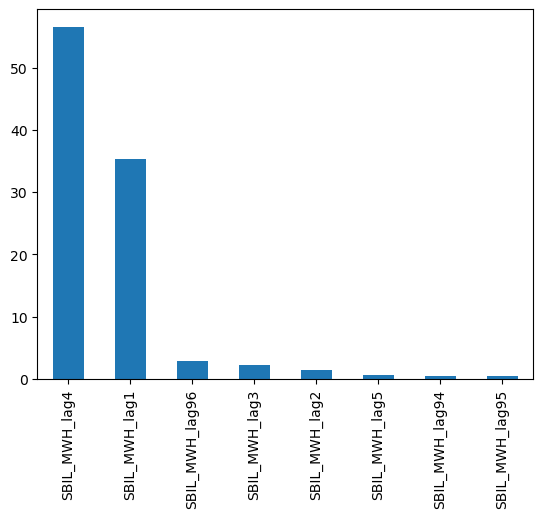

In [4]:
import matplotlib.pyplot as plt
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()

# Hourly Imbalance

In [5]:
import sys
print(sys.path)
import os
import pandas as pd
import numpy as np

# Add the source directory to the system path
sys.path.append(os.path.abspath('../src'))
from open_data import fetch_db_table_sqlserver16
import matplotlib.pyplot as plt

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SEGNO_QH" 
qh = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
qh = qh.sort_values(by='ORAINI')

# Filter the DataFrame for the relevant columns and rows
qh = qh[['MACROZONA', 'ORAINI', 'SBIL_MWH']]
# Convert ORAINI to datetime using the correct method
qh['ORAINI'] = pd.to_datetime(qh['ORAINI'], format='%Y%m%d%H%M')
qh.set_index('ORAINI', inplace=True)
# Nord
qh_nord = qh[qh['MACROZONA'] == 'NORD']
# Sud
qh_sud = qh[qh['MACROZONA'] == 'SUD']

# Resample to hourly data and take the sum of 'SBIL_MWH' for each hour
h_nord = qh_nord.resample('H').sum()

# Clean the 'MACROZONA' column to retain only 'NORD'
h_nord['MACROZONA'] = h_nord['MACROZONA'].str[:4]

['c:\\Users\\samueledelia\\.conda\\envs\\myenv\\python312.zip', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\DLLs', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv', '', 'C:\\Users\\samueledelia\\AppData\\Roaming\\Python\\Python312\\site-packages', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\win32', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\samueledelia\\.conda\\envs\\myenv\\Lib\\site-packages\\setuptools\\_vendor']


c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)
C:\Users\samueledelia\AppData\Local\Temp\2\ipykernel_4324\751685697.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  h_nord = qh_nord.resample('H').sum()


In [6]:
lags = [-x for x in range(1, 7)]
lags.extend([23, 24, 25, 47, 48, 72, 96])

# Create a new DataFrame with SBIL_MWH and its lagged values
df_sbil_lagged = h_nord

# Add lagged columns
for lag in lags:
    df_sbil_lagged[f'SBIL_MWH_lag{abs(lag)}'] = df_sbil_lagged['SBIL_MWH'].shift(-lag)

# Drop rows with NaN values due to shifting
df_sbil_lagged.dropna(inplace=True)

df_sbil_lagged = df_sbil_lagged.drop(columns="MACROZONA")
# Display the resulting DataFrame
df_sbil_lagged.head()

,SBIL_MWH,SBIL_MWH_lag1,SBIL_MWH_lag2,SBIL_MWH_lag3,SBIL_MWH_lag4,SBIL_MWH_lag5,SBIL_MWH_lag6,SBIL_MWH_lag23,SBIL_MWH_lag24,SBIL_MWH_lag25,SBIL_MWH_lag47,SBIL_MWH_lag48,SBIL_MWH_lag72,SBIL_MWH_lag96
ORAINI,,,,,,,,,,,,,,
2019-01-01 06:00:00,358.940,256.550,162.699,127.792,-88.849,-112.451,-111.900,439.030,664.683,818.870,74.800,416.782,386.388,-369.591
2019-01-01 07:00:00,689.284,358.940,256.550,162.699,127.792,-88.849,-112.451,664.683,818.870,489.239,416.782,533.108,322.996,-294.889
2019-01-01 08:00:00,1055.124,689.284,358.940,256.550,162.699,127.792,-88.849,818.870,489.239,108.922,533.108,490.183,254.382,-220.332
2019-01-01 09:00:00,1077.605,1055.124,689.284,358.940,256.550,162.699,127.792,489.239,108.922,-62.390,490.183,560.809,277.171,-500.042
2019-01-01 10:00:00,1031.111,1077.605,1055.124,689.284,358.940,256.550,162.699,108.922,-62.390,125.520,560.809,706.907,218.616,-590.472


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_sbil_lagged.columns if feature != TARGET]

df_sbil_lagged = df_sbil_lagged.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_sbil_lagged[FEATURES], df_sbil_lagged[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s


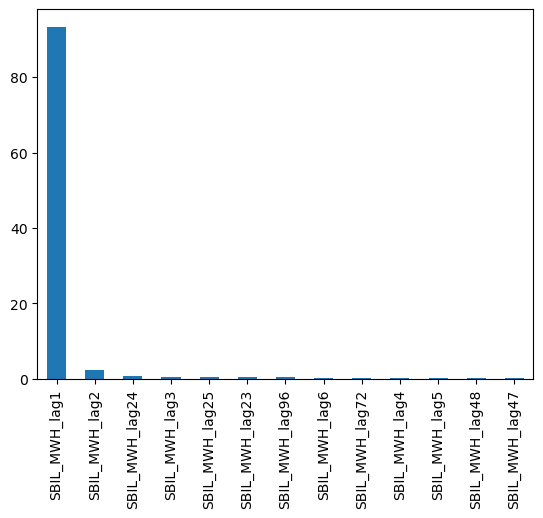

In [ ]:
import matplotlib.pyplot as plt
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()